<h1 style="text-align:center;font-size:40px">Real & Fake News Predictor</h1>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer, TfidfVectorizer
import nltk
from string import punctuation
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer,WordNetLemmatizer

In [3]:
data = pd.read_csv('news.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
data.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


In [6]:
data.describe()

,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3171


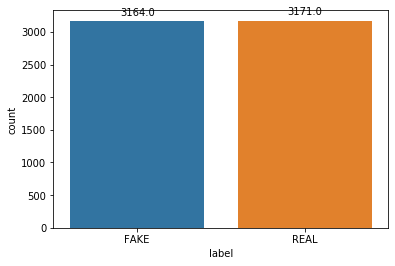

In [7]:
f = sns.countplot(x='label',data=data)  # Lot of people haven't taken the loan
for i in f.patches:
    p= plt.annotate(format(i.get_height(), '.1f'), 
                   (i.get_x() + i.get_width() / 2., i.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [8]:
data.groupby('label').describe()

title                                                                 \
      count unique                                                top freq   
label                                                                        
FAKE   3164   3107  Hillary’s “Big Tent” is Obama’s “Grand Bargain...    3   
REAL   3171   3149                      OnPolitics | 's politics blog    5   

       text                                                                 
      count unique                                                top freq  
label                                                                       
FAKE   3164   3071                                                      36  
REAL   3171   2989  Killing Obama administration rules, dismantlin...   58

In [9]:
data['text'] = data['text'].apply(lambda x: ' '.join(x.split()[0:200]))

In [10]:
data['text_length'] = data['text'].str.split().str.len()
data.sample(5)

,title,text,label,text_length
510,"Ryan so far proves he can 'make the sausage,' ...",And the Wisconsin Republican isn’t talking abo...,REAL,200
506,The World Is About To Witness A Breathtaking O...,"31 GOLD , KWN King World News On the heels of ...",FAKE,200
3955,Obama Chief Of Staff: Israel's 50-Year 'Occupa...,"Through his chief of staff, President Obama is...",REAL,200
631,Collusion Between Facebook and Hillary’s Campa...,"Posted on October 29, 2016 by Michael DePinto ...",FAKE,200
438,"Hillary Clinton, FBI and the Real November Sur...","Hillary Clinton, FBI and the Real November Sur...",FAKE,200


In [11]:
data.groupby('label').describe().T

label                     FAKE         REAL
text_length count  3164.000000  3171.000000
            mean    176.516435   182.799117
            std      51.824731    50.323512
            min       0.000000     7.000000
            25%     200.000000   200.000000
            50%     200.000000   200.000000
            75%     200.000000   200.000000
            max     200.000000   200.000000

In [12]:
data[data['text_length']==data['text_length'].max()]

,title,text,label,text_length
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,200
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,200
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,200
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,200
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,200
...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,200
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,200
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligarc...,FAKE,200
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,200


In [13]:
data["title_length"] = data['title'].str.split().str.len()
data.sample(5)

,title,text,label,text_length,title_length
853,"Donald Trump, president of the Confederacy: Th...","Of course, Republicans and conservatives find ...",REAL,200,14
3646,Lynch faces Congress in attorney general hearing,Washington (CNN) Attorney General nominee Lore...,REAL,200,7
2891,Rubio surges back to electrify South Carolina,"His wife, Melania, and 10-year-old son, Barron...",REAL,19,7
1593,Ron Paul to Trump: Don't Listen to Neocons!,"Written by Adam Dick Friday November 11, 2016 ...",FAKE,200,8
2900,U.S. Flag Flies Over Embassy In Cuba For First...,U.S. Flag Flies Over Embassy In Cuba For First...,REAL,200,13


In [14]:
max_len = data[data['title_length']==data['title_length'].max()]
max_len

,title,text,label,text_length,title_length
1663,"Life: If You Love Enamel Pins, You’ll Love Thi...","Email If you can’t get enough enamel pins, the...",FAKE,200,53


In [15]:
data[(data['text_length']==0) & (data['label']=='FAKE')]

,title,text,label,text_length,title_length
106,The Arcturian Group by Marilyn Raffaele Octobe...,,FAKE,0,10
710,MARKETWATCH LEFTIST: MSM’s “Blatant” Anti Trum...,,FAKE,0,10
806,Southern Poverty Law Center Targets Anti-Jihad...,,FAKE,0,10
919,Refugee Resettlement Watch: Swept Away In Nort...,,FAKE,0,8
940,Michael Bloomberg Names Technological Unemploy...,,FAKE,0,11
1664,Alert News : Putins Army Is Coming For World W...,,FAKE,0,16
1736,An LDS Reader Takes A Look At Trump Accuser Je...,,FAKE,0,17
1851,America’s Senator Jeff Sessions Warns of Worse...,,FAKE,0,10
1883,Paris Migrant Campers Increase after Calais Is...,,FAKE,0,8
1941,Putins Army is coming for World war 3 against ...,,FAKE,0,15


In [16]:
data = data[data['text_length']!=0]

In [17]:
data.groupby('label').describe().T

label                      FAKE         REAL
text_length  count  3128.000000  3171.000000
             mean    178.547954   182.799117
             std      48.516841    50.323512
             min       1.000000     7.000000
             25%     200.000000   200.000000
             50%     200.000000   200.000000
             75%     200.000000   200.000000
             max     200.000000   200.000000
title_length count  3128.000000  3171.000000
             mean     11.137468     9.861243
             std       4.559064     3.199711
             min       1.000000     2.000000
             25%       8.000000     8.000000
             50%      11.000000    10.000000
             75%      13.000000    12.000000
             max      53.000000    27.000000

In [18]:
data.shape

(6299, 5)

In [19]:
lemma = WordNetLemmatizer()
stemmer = PorterStemmer()

In [20]:
sw = ['’','”','“','–','—']

In [21]:
def text_process(t):
    all_words = []
    for sent in nltk.sent_tokenize(t.lower()):
        words = nltk.word_tokenize(sent)
        words = [word for word in words if (word not in stopwords.words('english'))]
        words =[stemmer.stem(word) for word in words]
        words = [word for word in words if word not in punctuation]
        words = [word for word in words if not word.isnumeric()]
        all_words+=words
    all_words = ''.join([ ch for ch in  ' '.join(all_words) if (ch not in punctuation) and (not ch.isnumeric()) and (ch not in sw)])
    
    return all_words

In [22]:
text_process(max_len["text"].values[0])

'email  get enough enamel pin  time start freak etsi shop hundr uniqu design mix match  easi get lost enamel fan  wonderland check mayb enamel  problem forget pin case get readi explod moment see littl guy  bulldog puppi  month oldoh mention ador face anyon ever seen bulldog  trick hey  total okay let  move  incred pizza  grill chees need belli asap collect annihil mind  slobber uncontrol food food melt quiver puddl ye keep scroll  get start find thing diabol optic illus go destroy mind total brain collaps three…two…one… work sure lost'

In [23]:
data['text']

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6299, dtype: object

In [24]:
data['text'].head(5).apply(text_process)

0    daniel greenfield shillman journal fellow free...
1    googl pinterest digg linkedin reddit stumbleup...
2    us secretari state john f kerri said monday st...
3     kayde king kaydeek novemb lesson tonight s de...
4    s primari day new york frontrunn hillari clint...
Name: text, dtype: object

In [25]:
data['text_length'].max()

200

In [26]:
data["text"]=data["text"].apply(text_process)

In [27]:
tfidfV = TfidfVectorizer()
tf_idf = tfidfV.fit_transform(data['text'])

In [28]:
tf_df = pd.DataFrame(tf_idf.toarray(),columns=tfidfV.get_feature_names())
tf_df.head()

,aa,aaa,aaadd,aab,aadmi,aaliya,aam,aamaq,aap,aarhu,...,ťđ,ελληνικά,νοεμβρίου,главная,октября,русский,эa,эin,القادمون,عربي
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
tf_df.shape

(6299, 29265)

In [30]:
tfidfV.get_feature_names()

['aa',
 'aaa',
 'aaadd',
 'aab',
 'aadmi',
 'aaliya',
 'aam',
 'aamaq',
 'aap',
 'aarhu',
 'aaron',
 'aaronapollocamp',
 'aarondmiller',
 'aarp',
 'aasetlayout',
 'ab',
 'abaaoud',
 'ababa',
 'aback',
 'abadi',
 'abandon',
 'abat',
 'abba',
 'abbar',
 'abbey',
 'abbeyinspir',
 'abbi',
 'abbott',
 'abbottabad',
 'abc',
 'abcnewsgocom',
 'abcpolit',
 'abcwashington',
 'abd',
 'abdel',
 'abdelhamid',
 'abdelmoumen',
 'abdeslam',
 'abdic',
 'abdikadir',
 'abdkir',
 'abdollahi',
 'abdomen',
 'abdomin',
 'abdrabbu',
 'abduct',
 'abductor',
 'abdul',
 'abdulazeez',
 'abdulaziz',
 'abdulla',
 'abdullah',
 'abdulzai',
 'abdur',
 'abe',
 'abedin',
 'abedini',
 'abedinwein',
 'abel',
 'abeldangernet',
 'aberfan',
 'abernathi',
 'aberr',
 'aberrationssudden',
 'abet',
 'abhor',
 'abhorr',
 'abiali',
 'abid',
 'abigail',
 'abil',
 'abitt',
 'abject',
 'abjectli',
 'abl',
 'ablaz',
 'abli',
 'abnorm',
 'abnoush',
 'aboard',
 'abolish',
 'abolit',
 'abomin',
 'abomination',
 'abood',
 'aborigin',
 'a

### Splitting into training and testing data

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(tf_df,data['label'],test_size=0.25,random_state=101)

In [33]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
model_b = BernoulliNB().fit(xtrain,ytrain)
print(model_b.score(xtrain,ytrain))
print(model_b.score(xtest,ytest))

0.9449618966977138
0.8831746031746032


In [35]:
model_m = MultinomialNB().fit(xtrain,ytrain)
print(model_m.score(xtrain,ytrain))
print(model_m.score(xtest,ytest))

0.930567315834039
0.8622222222222222


### Deployment

In [36]:
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(data['text'],data['label'],test_size=0.25, random_state=11)

In [37]:
from sklearn.pipeline import Pipeline

In [38]:
ddd = map(text_process,data['text'])

In [39]:
TfidfVectorizer().fit_transform(ddd)

<6299x28460 sparse matrix of type '<class 'numpy.float64'>'
	with 500106 stored elements in Compressed Sparse Row format>

In [40]:
model_pipe = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('clf',BernoulliNB())
])

In [41]:
model_pipe.fit(xtrain1,ytrain1)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000000000EC5ACA8>)),
                ('tfidf', TfidfTransformer()), ('clf', BernoulliNB())])

In [42]:
model_pipe.score(xtrain1,ytrain1)

0.642675698560542

In [43]:
model_pipe.score(xtest1,ytest1)

0.6387301587301587

In [44]:
ypred = model_pipe.predict(xtest1)

In [45]:
print(classification_report(ytest1,ypred))

              precision    recall  f1-score   support

        FAKE       0.82      0.33      0.47       766
        REAL       0.59      0.93      0.73       809

    accuracy                           0.64      1575
   macro avg       0.71      0.63      0.60      1575
weighted avg       0.70      0.64      0.60      1575



In [49]:
from sklearn.metrics import accuracy_score
pred = model_b.predict(xtest)
score = accuracy_score(ytest, pred)


In [50]:
print("Accuracy of the model: {}%".format(score*100))

Accuracy of the model: 88.31746031746032%


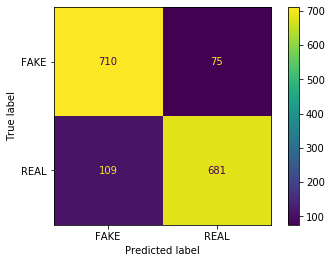

In [77]:
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(ytest, pred)
plot_confusion_matrix(model_b,xtest,ytest)